# Existe alguma relação entre a Área Agricultável de um país e seu PIB per capta?

# Ativando as Bibliotecas necessárias

In [61]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Manipulando planilhas

In [62]:
GDP_per_Capita = pd.read_excel("gdp_per_capita_yearly_growth.xlsx")
GDP_per_Capita_indexado = GDP_per_Capita.set_index('country')
GDP_per_Capita_indexado_transpose = GDP_per_Capita_indexado.transpose()

# Realizando Locs para filtrar os países da OECD

In [63]:
OECD = GDP_per_Capita_indexado.loc[("Australia" , "Austria", "Belgium", "Canada", "Chile", "Czech Republic", "Denmark", "Estonia", 
                                    "Finland", "France", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Israel", "Italy",
                                   "Japan", "South Korea", "Latvia", "Lithuania", "Luxembourg", "Mexico", "Netherland", "New Zealand",
                                   "Norway", "Poland", "Portugal", "Slovak Republic", "Slovenia", "Spain", "Sweden", "Switzerland",
                                   "Turkey", "United Kingdom", "United States") , :]


OECD_selecionados = OECD.loc[("United States", "Switzerland", "Luxembourg") , [1961,1962,1963,1964,1965]]
OECD_antes = OECD.loc[("United States", "Switzerland", "Luxembourg") , [1955,1956,1957,1958,1959,1960]]
OECD_selecionados["PERTENCE"] = "SIM"
OECD_antes["PERTENCE"] = "NÃO"

Não_parte = GDP_per_Capita_indexado.loc[("Brazil" , "Argentina") , [1961,1962,1963,1964,1965 ] ]
Não_parte["PERTENCE"] = "Não"

Transposed_OECD = OECD_selecionados.transpose()


#Transposed_OECD_pertencimento = Transposed_OECD["PERTENCE"] = "Talvez"




Países_juntos = OECD_selecionados.join(Não_parte, how='outer', lsuffix='_DENTRO', rsuffix='_FORA')

#OECD_juntos = OECD_selecionados.join(OECD_antes, how='outer', lsuffix='_Existe', rsuffix='_N_Existe')
#OECD_juntos.transpose()

OECD_transposado = OECD.transpose()
OECD_transposado.head(5)
#if "Australia" in OECD.index:
    #print("Batata")
    #Utilizar esse método para preencher uma nova coluna, após criá-la com o Loc

country,Australia,Austria,Belgium,Canada,Chile,Czech Republic,Denmark,Estonia,Finland,France,...,Poland,Portugal,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
1801,0.216,0.388,0.0391,0.622,NaN,NaN,0.17,0.104,0.169,0.415,...,0.371,0.0996,NaN,0.104,0.228,-0.836,0.169,0.177,0.22,1.8500
1802,0.216,0.388,0.0391,0.622,NaN,NaN,0.17,0.104,0.169,0.415,...,0.371,0.0996,NaN,0.104,0.228,4.620,0.169,0.177,0.31,1.5900
1803,0.216,0.388,0.0391,0.622,NaN,NaN,0.17,0.104,0.169,0.415,...,0.371,0.0996,NaN,0.104,0.228,-0.988,0.169,0.177,-3.23,-1.6400
1804,0.216,0.388,0.0391,0.622,NaN,NaN,0.17,0.104,0.169,0.415,...,0.371,0.0996,NaN,0.104,0.228,-6.520,0.169,0.177,-1.47,-0.0758
1805,0.216,0.388,0.0391,0.622,NaN,NaN,0.17,0.104,0.169,0.415,...,0.371,0.0996,NaN,0.104,0.228,6.400,0.169,0.177,4.50,2.0500


# Teste

In [7]:
Países_juntos.fillna("NÃO EXISTE")

,1961_DENTRO,1962_DENTRO,1963_DENTRO,1964_DENTRO,1965_DENTRO,PERTENCE_DENTRO,1961_FORA,1962_FORA,1963_FORA,1964_FORA,1965_FORA,PERTENCE_FORA
country,,,,,,,,,,,,
Argentina,NÃO EXISTE,NÃO EXISTE,NÃO EXISTE,NÃO EXISTE,NÃO EXISTE,NÃO EXISTE,5.48,-3.18,-3.93,8.76,7.64,Não
Brazil,NÃO EXISTE,NÃO EXISTE,NÃO EXISTE,NÃO EXISTE,NÃO EXISTE,NÃO EXISTE,5.59,3.81,-2.29,0.514,-0.487,Não
Luxembourg,3.13,0.526,0.423,8.35,0.393,SIM,NÃO EXISTE,NÃO EXISTE,NÃO EXISTE,NÃO EXISTE,NÃO EXISTE,NÃO EXISTE
Switzerland,5.15,1.94,2.67,3.5,2.21,SIM,NÃO EXISTE,NÃO EXISTE,NÃO EXISTE,NÃO EXISTE,NÃO EXISTE,NÃO EXISTE
United States,0.653,4.41,2.83,4.34,5.06,SIM,NÃO EXISTE,NÃO EXISTE,NÃO EXISTE,NÃO EXISTE,NÃO EXISTE,NÃO EXISTE


# Aqui começa a Análise Quantitativa dos Dados:

In [58]:
United_States = GDP_per_Capita_indexado.loc[("United States") , : ]
United_States
United_States.describe()

count    218.000000
mean       1.638708
std        4.614562
min      -21.400000
25%       -0.580250
50%        1.835000
75%        3.520000
max       18.700000
Name: United States, dtype: float64

# Cria-se uma nova planilha, com o intuito de filtrar o Brazil e Argentina

In [59]:
América_latina = GDP_per_Capita_indexado.loc[("Brazil", "Argentina") , : ]

América_juntados = América_latina.transpose()

Países_juntados = OECD_transposado.join(América_juntados, how='inner', lsuffix='_DENTRO', rsuffix='_FORA')


Agremiação = Países_juntados.loc[(Países_juntados.index > 1950) & (Países_juntados.index <= 1965) , ["Poland","United States","Argentina","Brazil"] ]
Agremiação.head(5)
#Pensar o porque
#Pensar com causa

country,Poland,United States,Argentina,Brazil
1951,2.590,5.80,1.75,2.04
1952,0.437,1.98,-7.09,4.39
1953,3.830,2.88,3.32,1.75
1954,3.710,-2.39,2.21,4.82
1955,2.910,5.19,5.20,5.79


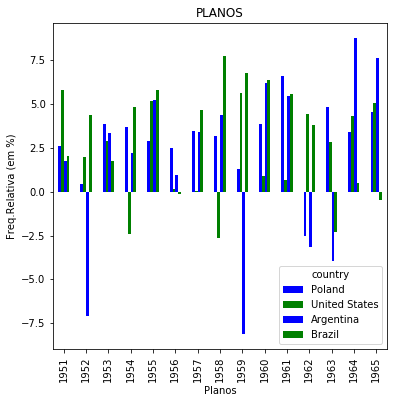

In [60]:
# Gráfico de barras
plot = Agremiação.plot(kind='bar',title='PLANOS',figsize=(6, 6),color=('b','g'))
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Planos')
plt.show()